In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from tensorflow.keras.datasets import mnist

import tensorflow.keras.backend as K

In [14]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [15]:
print("Dimension of x_train",x_train.shape)
print("Dimension of x_test",x_test.shape)
print("Dimension of y_test",y_test.shape)

Dimension of x_train (60000, 28, 28)
Dimension of x_test (10000, 28, 28)
Dimension of y_test (10000,)


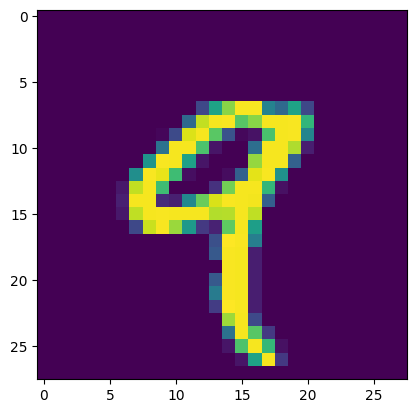

9


In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(x_train[4])
plt.show()
print(y_train[4])

In [17]:
num_classes = 10

epochs = 30
img_rows = 28 
img_cols = 28


In [18]:
x_train =x_train.astype(float)
x_train =x_train/255
x_test =x_test.astype(float)
x_test =x_test/255

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10, dtype = 'float32')
y_test = to_categorical(y_test, num_classes = 10, dtype = 'float32')

In [19]:
if K.image_data_format() =='channels_first':
    x_train = x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
    x_test = x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
    input_shape = (1,img_rows,img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
    x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
    input_shape = (img_rows,img_cols,1)

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = input_shape))
model.add(MaxPooling2D())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 11, 11, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 batch_normalization_6 (Batc  (None, 6, 6, 32)        

In [23]:
model.fit(x_train,y_train,batch_size=30,epochs=epochs,validation_data=(x_test,y_test))

Epoch 1/30
2000/2000 [==============================] - 48s 24ms/step - loss: 0.3084 - accuracy: 0.9110 - val_loss: 0.0741 - val_accuracy: 0.9773
Epoch 2/30
2000/2000 [==============================] - 47s 23ms/step - loss: 0.1059 - accuracy: 0.9718 - val_loss: 0.0440 - val_accuracy: 0.9854
Epoch 3/30
2000/2000 [==============================] - 47s 23ms/step - loss: 0.0793 - accuracy: 0.9786 - val_loss: 0.0370 - val_accuracy: 0.9883
Epoch 4/30
2000/2000 [==============================] - 44s 22ms/step - loss: 0.0679 - accuracy: 0.9819 - val_loss: 0.0328 - val_accuracy: 0.9905
Epoch 5/30
2000/2000 [==============================] - 47s 23ms/step - loss: 0.0607 - accuracy: 0.9841 - val_loss: 0.0297 - val_accuracy: 0.9919
Epoch 6/30
2000/2000 [==============================] - 46s 23ms/step - loss: 0.0524 - accuracy: 0.9857 - val_loss: 0.0308 - val_accuracy: 0.9906
Epoch 7/30
2000/2000 [==============================] - 46s 23ms/step - loss: 0.0462 - accuracy: 0.9872 - val_loss: 0.0261 -

In [24]:
score ,acc = model.evaluate(x_test,y_test)
print("Score is :",score)
print("Accuracy :",acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0189 - accuracy: 0.9957
Score is : 0.01886928640305996
Accuracy : 0.9957000017166138


In [25]:
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("models.h5")

In [26]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model,'/home/ubuntu/love/keras')